In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [5]:
data=pd.read_csv('data/titanic.csv')
data.shape

(887, 8)

On dispose d'un dataset contenant 887 individu., et 8 colonne (7 features et 1 labels). On affiche d'abord les premier 10 lingne du dataset

In [6]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


### On commence par explorer le deataset 

On regarde le nombre des survivants et des non survivant dans notr dataset

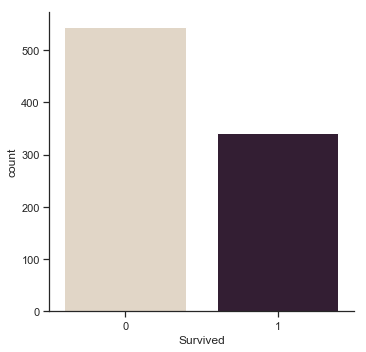

In [10]:
sns.catplot(x="Survived", kind="count", palette="ch:.25", data=data);

Il est clair que le nombre des survivants est inférieur par rapport au nombre des non survivants.

On explore maintenant l'influence du sexe sur le survécu des individus: 

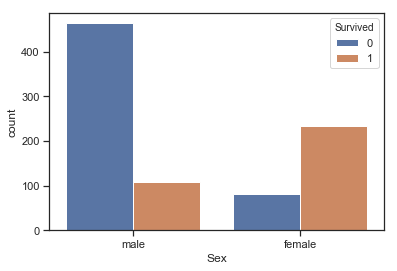

In [37]:
ax = sns.countplot(x="Sex", hue="Survived", data=data)

Le sexe semble être une caractéristique très intéressante. Le taux de survie des hommes est nettement inférieur à celui des femmes. Seulement $81$ femmes sont mortes sur $344$. Mais $109$ hommes ont survécu sur $577$. Cela signifie que les femmes ont reçu une priorité élevée pendant le sauvetage. 

On explore maintenant l'effet de $\textbf{Pclass}$

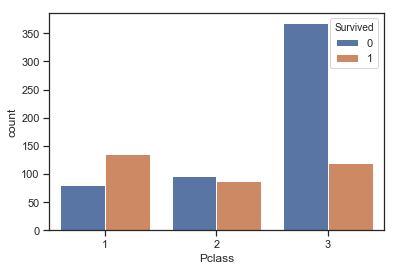

In [38]:
ax = sns.countplot(x="Pclass", hue="Survived", data=data)

On voit clairement que les passagers de la classe 1 sont hautement prioritaires pendant le sauvetage. Le nombre de passagers en classe 3 est supérieur à celui des classes 1 et 2, mais très peu, près de $25\%$ en classe 3 ont survécu. En classe 2, les taux de survie et de non-survie sont de $49\%$ et $51\%$ environ. En classe 1, près de $68\%$ des personnes ont survécu. Donc, la classe socio-economique influence sur les chances de survie.

On explore maintenant l'influence de l'âge sur les chance de survie, tout d'abord

C:\Users\Othmane\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


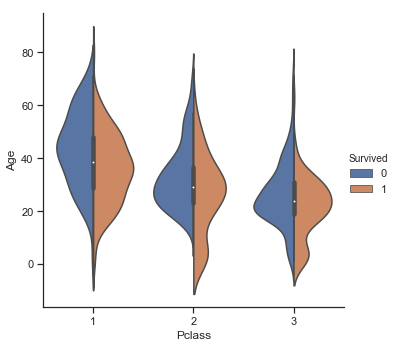

In [46]:
ax = sns.catplot(x="Pclass", y = "Age", hue = "Survived" ,kind = "violin",split = True, data = data) 

C:\Users\Othmane\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


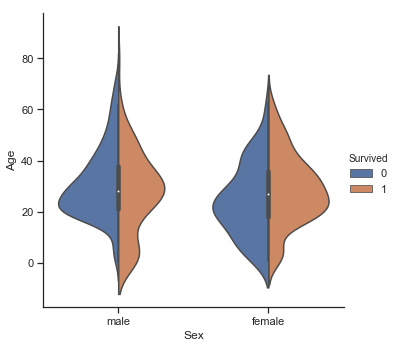

In [47]:
ax = sns.catplot(x="Sex", y = "Age", hue = "Survived" ,kind = "violin",split = True, data = data) 

<Figure size 7200x7200 with 0 Axes>

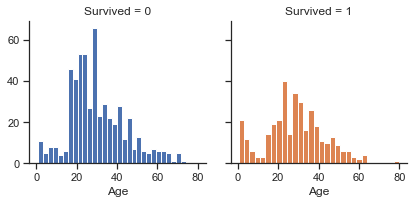

In [57]:
plt.figure(figsize=(100, 100))
g = sns.FacetGrid(data, col='Survived',hue = "Survived")
g.map(plt.hist, 'Age', bins=30)

On explore maintenant l'influen de "Siblings/Spouses" 

C:\Users\Othmane\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Othmane\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


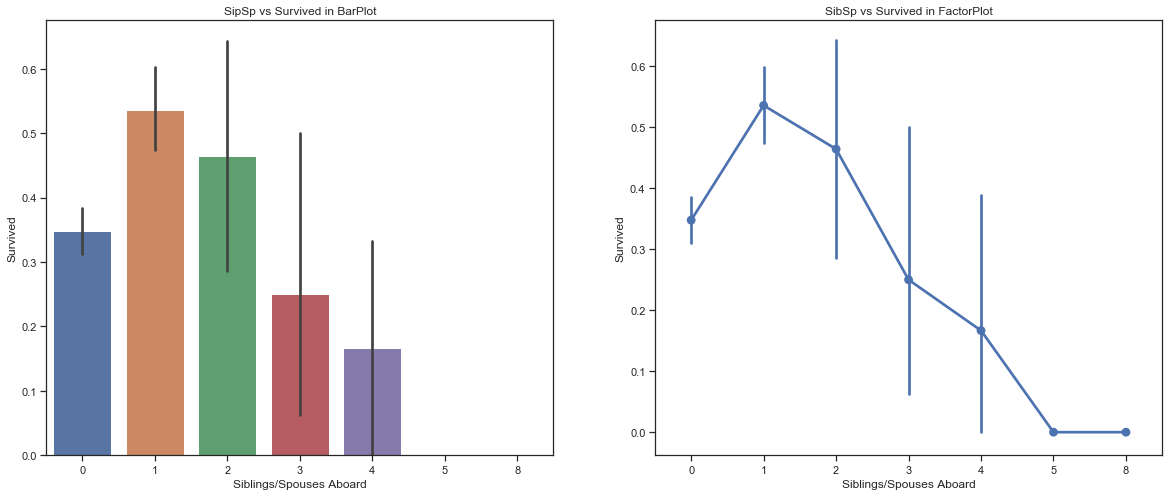

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Siblings/Spouses Aboard','Survived', data=data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('Siblings/Spouses Aboard','Survived', data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

Le Barplot et  le FactorPlot  montrent que si un passager est seul dans le navire sans frères et sœurs, le taux de survie est de 34,5\%. Le graphique diminue à mesure que le nombre de frères et sœurs augmente . Le taux de survie des familles de 5 à 8 membres est de 0\%, en fait les personnes avec SibSp> 3 était dans Pclass3. Il est imminent que toutes les familles nombreuses de la classe Pclass3 (> 3) soient décédées.

On explore maintenant l'influen de "Parents/Children" 

C:\Users\Othmane\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Othmane\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


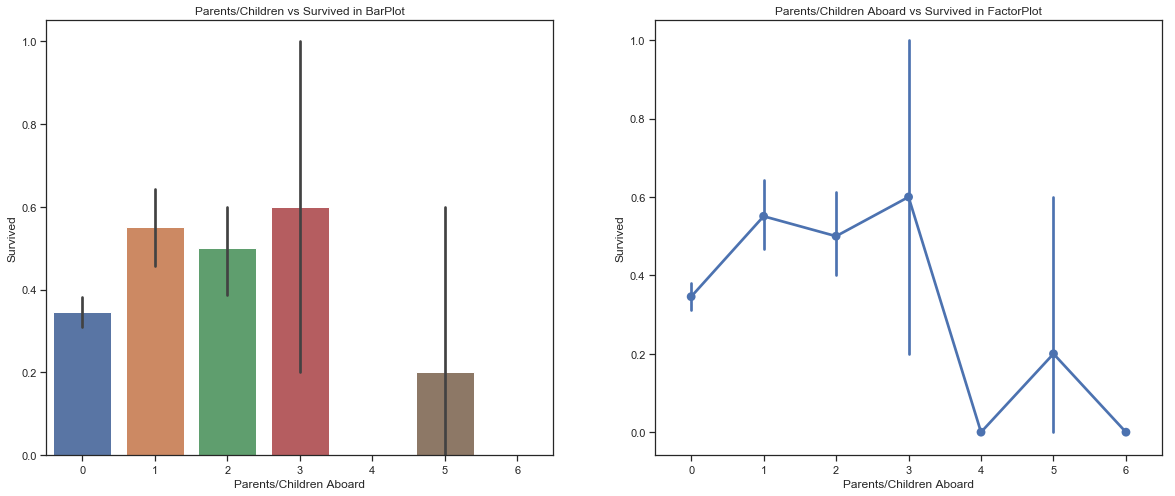

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parents/Children Aboard','Survived', data=data,ax=ax[0])
ax[0].set_title('Parents/Children vs Survived in BarPlot')
sns.factorplot('Parents/Children Aboard','Survived', data=data,ax=ax[1])
ax[1].set_title('Parents/Children Aboard vs Survived in FactorPlot')
plt.close(2)
plt.show()

Le barplot et le FactorPlot montrent que les indivdus ayant 1,2 ou 3 Parents/Enfants dans le navire ont plus de chance de survivre, et que les personne ayant plus que 4 Parents/Enfants on moins de chance de survivre.

On explore maintenant l'influence du Nom sur la survie dans Titanic

In [66]:
data['Title'] = data['Name'].str.split().str[0].str.strip()
data.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [5]:
data.loc[ data['Title']== 'Mr.', 'new_title'] = 0
data.loc[data['Title'] =='Miss.', 'new_title'] = 1
data.loc[data['Title'] =='Mrs.', 'new_title'] = 2
data.loc[data['Title'] =='Rare', 'new_title'] = 3


In [6]:
data.loc[data['Sex']== 'male', 'sex'] = 0
data.loc[data['Sex'] =='female', 'sex'] = 1

In [7]:
data=data.drop('Sex',axis=1)

In [8]:
data.head(15)

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Title,new_title,sex
0,0,3,Mr. Owen Harris Braund,22.0,1,0,7.2500,Mr.,0.0,0.0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,Mrs.,2.0,1.0
2,1,3,Miss. Laina Heikkinen,26.0,0,0,7.9250,Miss.,1.0,1.0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,Mrs.,2.0,1.0
4,0,3,Mr. William Henry Allen,35.0,0,0,8.0500,Mr.,0.0,0.0
5,0,3,Mr. James Moran,27.0,0,0,8.4583,Mr.,0.0,0.0
6,0,1,Mr. Timothy J McCarthy,54.0,0,0,51.8625,Mr.,0.0,0.0
7,0,3,Master. Gosta Leonard Palsson,2.0,3,1,21.0750,Master.,NaN,0.0
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,27.0,0,2,11.1333,Mrs.,2.0,1.0
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,14.0,1,0,30.0708,Mrs.,2.0,1.0


In [11]:
data['FareBand'] = pd.qcut(data['Fare'], 5)

In [12]:
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.858]",0.219101
1,"(7.858, 10.5]",0.203297
2,"(10.5, 22.225]",0.430233
3,"(22.225, 39.688]",0.441341
4,"(39.688, 512.329]",0.642045


In [13]:
data['FamilySize'] = data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard']+1
data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.305816
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
data.loc[ data['Fare'] <= 7.858, 'nFareBand'] = 0
data.loc[(data['Fare'] > 7.858) & (data['Fare'] <= 10.5), 'nFareBand'] = 1
data.loc[(data['Fare'] > 10.5) & (data['Fare'] <= 22.225), 'nFareBand'] = 2
data.loc[(data['Fare'] > 22.225) & (data['Fare'] <= 39.688), 'nFareBand'] = 3
data.loc[ data['Fare'] > 39.688, 'nFareBand'] = 4


data['nFareBand'] = data['nFareBand'].astype(int)
data['sex']=data['sex'].astype(int)

In [ ]:
new_data=data.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard','Name','Fare','Fare_Band','FareBand'], axis=1)

In [ ]:
new_data.head()

In [ ]:
new_data.to_csv('new_titanic_bis.csv')